In [35]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
def Convert(string): 
    li = list(string.split("\n>")) 
    return li

In [37]:
def fun(user):
    """Function fetches a list of 20 friends of a user from livejournal website."""

    url = "https://www.livejournal.com/misc/fdata.bml?user={}".format(user)
    r = requests.get(url)
    text = r.text
    new_text = Convert(text)
    list_of_friends = new_text[1:3]
    return list_of_friends

In [41]:
def friend_of_friend_graph(level):
    
    
    G = nx.Graph()
    friends_of_valerois = fun("valerois") # obtaining valerois's friends
    G.add_nodes_from(friends_of_valerois)
    
    for f in list(G.nodes()):
        G.add_edge("valerois", f)
        
    G.add_node("valerois")
    
    
    friends_of_friends = {"valerois": friends_of_valerois} # making dictionary for nodes and their friends,
                                                           # for now we have only one node in graph
    l = 1
    while l < level:
        l += 1
        for v in list(G.nodes()):
            if v not in friends_of_friends.keys():
                friends_of_friends[v] = fun(v) # adding new node (key) to the dictionary with friends (values)
    
        for k in friends_of_friends.keys():
            G.add_node(k)
            
            for fof in friends_of_friends[k]:
                G.add_edge(k,fof)
                 
    
    return G

In [46]:
test = friend_of_friend_graph(3)

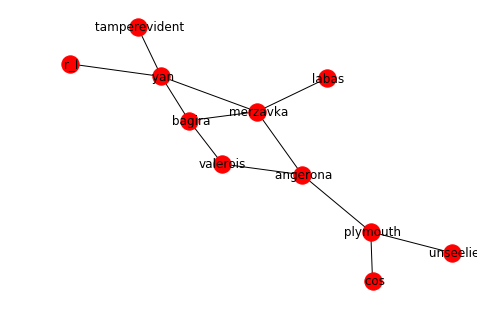

In [44]:
nx.draw(test, with_labels = True)
plt.show()

In [47]:
nx.write_adjlist(G, "G.adjlist")

In [48]:
fh=open("G.adjlist", 'rb')
G=nx.read_adjlist(fh)

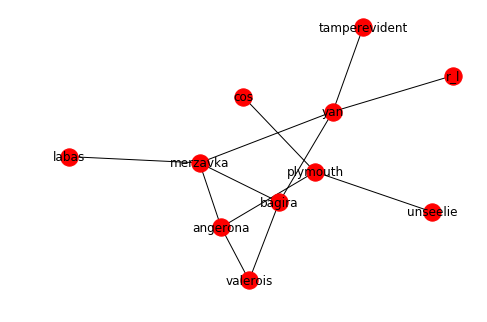

In [49]:
nx.draw(G, with_labels = True)
plt.show()